In [2]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''

# Specifying the folder where images are present
TrainingImagePath='/home/olitye/Code/AI/CNN/Face-Images/Final Training Images'
TestImagePath = '/home/olitye/Code/AI/CNN/Face-Images/Final Testing Images'
from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices
# training_set.class_indices

Found 4200 images belonging to 107 classes.
Found 1051 images belonging to 107 classes.


{'Adriana Lima-AM-1260': 0,
 'Alex Lawther-AF-1234': 1,
 'Alex Lawther-AM-1234': 2,
 'Alexandra Daddario-AF-1294': 3,
 'Alvaro Morte-AF-1258': 4,
 'Amanda Crew-AF-1338': 5,
 'Andy Samberg-AF-1330': 6,
 'Anne Hathaway-AM-1286': 7,
 'Anthony Mackie-AM-1268': 8,
 'Avril Lavigne-AF-1282': 9,
 'Ben Affleck-AM-1257': 10,
 'Bill Gates-AM-1291': 11,
 'Bobby Morley-AM-1319': 12,
 'Brenton Thwaites-AF-1309': 13,
 'Brian J. Smith-AF-1306': 14,
 'Brie Larson-AF-1249': 15,
 'Chris Evans-AM-1267': 16,
 'Chris Hemsworth-AM-1261': 17,
 'Chris Pratt-AF-1298': 18,
 'Christian Bale-AM-1281': 19,
 'Cristiano Ronaldo-AF-1254': 20,
 'Danielle Panabaker-AM-1295': 21,
 'Dominic Purcell-AF-1237': 22,
 'Dwayne Johnson-AM-1275': 23,
 'Eliza Taylor-AF-1259': 24,
 'Elizabeth Lail-AF-1243': 25,
 'Emilia Clarke-AF-1276': 26,
 'Emma Stone-AM-1313': 27,
 'Emma Watson-AF-1242': 28,
 'Gwyneth Paltrow-AF-1316': 29,
 'Henry Cavil-AM-1290': 30,
 'Hugh Jackman-AF-1285': 31,
 'Inbar Lavi-AM-1274': 32,
 'Irina Shayk-AM-1270':

In [2]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

NameError: name 'training_set' is not defined

Found 722 images belonging to 43 classes.
Found 206 images belonging to 43 classes.
Mapping of Face and its ID {0: 'Alex Lawther-A-M-1247', 1: 'Alexandra Daddario-A-M-1246', 2: 'Alvaro Morte-A-M-1236', 3: 'Bill Gates-A-M-1304', 4: 'Danielle Panabaker-A-M-1330', 5: 'Dominic Purcell-A-M-1316', 6: 'Gwyneth Paltrow-A-M-1311', 7: 'Inbar Lavi-A-M-1235', 8: 'Irina Shayk-A-M-1289', 9: 'Jennifer Lawrence-A-M-1303', 10: 'Johnny Depp-A-M-1333', 11: 'barack obama-A-M-1272', 12: 'face1-A-M-11', 13: 'face10-A-M-6', 14: 'face11-A-M-18', 15: 'face12-A-M-14', 16: 'face13-A-M-15', 17: 'face14-A-M-16', 18: 'face15-A-M-19', 19: 'face16-A-M-8', 20: 'face2-A-M-25', 21: 'face3-A-M-4', 22: 'face4-A-M-10', 23: 'face5-A-M-10', 24: 'face6-A-M-13', 25: 'face7-A-M-17', 26: 'face8-A-M-16', 27: 'face9-A-M-9', 28: 'subject01-F-F-2232', 29: 'subject02-A-M-2229', 30: 'subject03-D-M-2223', 31: 'subject04-D-F-2235', 32: 'subject05-A-F-2233', 33: 'subject06-D-F-2228', 34: 'subject07-G-F-2222', 35: 'subject08-A-M-2225', 36

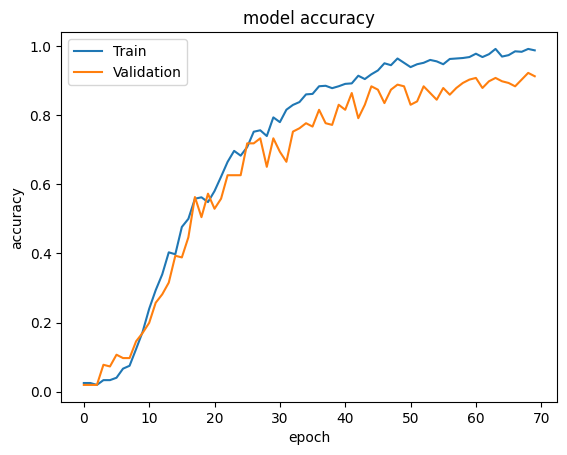

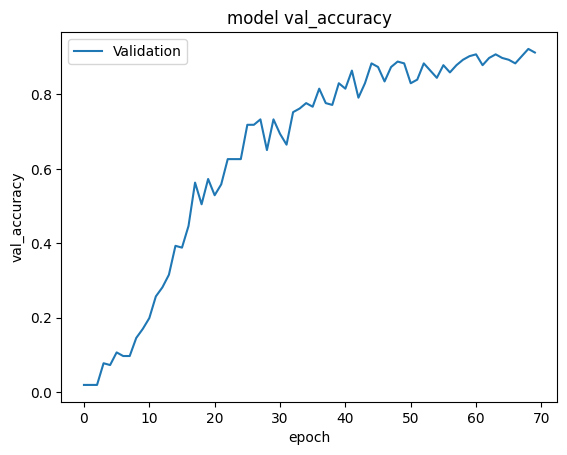

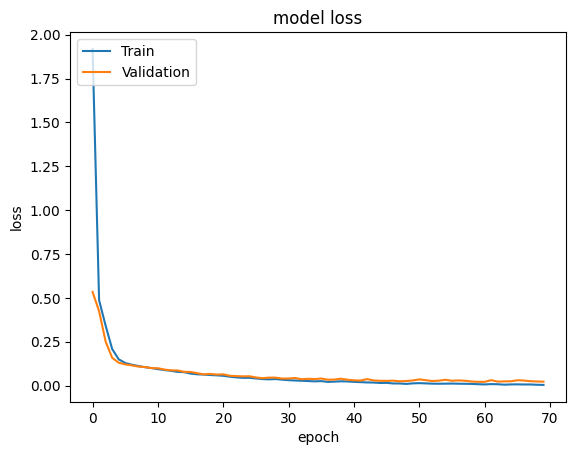

###### Total Time Taken:  10 Minutes ######


In [3]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import time
import pickle
import matplotlib.pyplot as plt

def train_model():

    TrainingImagePath='/home/olitye/Code/AI/CNN/Images/Training-Images'
    TestImagePath = '/home/olitye/Code/AI/CNN/Images/Testing-Images'


            
    # Deep Learning CNN model to recognize face
    '''This script uses a database of images and creates CNN model on top of it to test
    if the given image is recognized correctly or not'''
    
    '''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''
    
    
    from keras.preprocessing.image import ImageDataGenerator
    # Understand more about ImageDataGenerator at below link
    # https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
    
    # Defining pre-processing transformations on raw images of training data
    # These hyper parameters helps to generate slightly twisted versions
    # of the original image, which leads to a better model, since it learns
    # on the good and bad mix of images
    train_datagen = ImageDataGenerator(
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True)
    
    # Defining pre-processing transformations on raw images of testing data
    # No transformations are done on the testing images
    test_datagen = ImageDataGenerator()
    
    # Generating the Training Data
    training_set = train_datagen.flow_from_directory(
            TrainingImagePath,
            target_size=(64, 64),
            batch_size=64,
            class_mode='categorical')
    
    
    # Generating the Testing Data
    test_set = test_datagen.flow_from_directory(
            TestImagePath,
            target_size=(64, 64),
            batch_size=64,
            class_mode='categorical')
    
    # Printing class labels for each face
    test_set.class_indices
    '''############ Creating lookup table for all faces ############'''
    # class_indices have the numeric tag for each face
    TrainClasses=training_set.class_indices
    
    # Storing the face and the numeric tag for future reference
    ResultMap={}
    for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
        ResultMap[faceValue]=faceName
    
    # Saving the face map for future reference
    import pickle
    with open("ResultsMap.pkl", 'wb') as fileWriteStream:
        pickle.dump(ResultMap, fileWriteStream)
    
    # The model will give answer as a numeric tag
    # This mapping will help to get the corresponding face name for it
    print("Mapping of Face and its ID",ResultMap)
    
    # The number of neurons for the output layer is equal to the number of faces
    OutputNeurons=len(ResultMap)
    print('\n The Number of output neurons: ', OutputNeurons)

    '''######################## Create CNN deep learning model ########################'''
    from keras.models import Sequential
    from keras.layers import Convolution2D
    from keras.layers import MaxPool2D
    from keras.layers import Flatten
    from keras.layers import Dense
    
    '''Initializing the Convolutional Neural Network'''
    classifier = Sequential()

    # Adding the first layer of CNN
    classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64, 64, 3), activation='relu'))
    classifier.add(MaxPool2D(pool_size=(2, 2)))

    # Additional convolutional layer for better accuracy
    classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    classifier.add(MaxPool2D(pool_size=(2, 2)))

    # Another convolutional layer
    classifier.add(Convolution2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    classifier.add(MaxPool2D(pool_size=(2, 2)))

    # Yet another convolutional layer
    classifier.add(Convolution2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    classifier.add(MaxPool2D(pool_size=(2, 2)))

    '''Flattening'''
    classifier.add(Flatten())

    '''Fully Connected Neural Network'''
    classifier.add(Dense(64, activation='relu'))
    classifier.add(Dense(OutputNeurons, activation='softmax'))


    '''Compiling the CNN'''
    from keras.optimizers import Adam
    classifier.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    #####################################################
    import time
    # Measuring the time taken by the model to train
    StartTime = time.time()

    # Starting the model training
    history = classifier.fit(
        training_set,
        epochs=70,
        validation_data=test_set,
    )




    import matplotlib.pyplot as plt

    # steps_per_epoch = # of training images // batch_size

    

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # summarize history for val_accuracy
    plt.plot(history.history['val_accuracy'])
    plt.title('model val_accuracy')
    plt.ylabel('val_accuracy')
    plt.xlabel('epoch')
    plt.legend(['Validation'], loc='upper left')
    plt.show()


    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    


    
    EndTime=time.time()
    print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')
    classifier.save("face_recognition_model.keras")

train_model()

In [4]:
# predict every images in Final Testing Images 2 and save it in accurary variable 

from keras.models import load_model
import numpy as np

model = load_model('face_recognition_model.keras')

# load the image
from keras.preprocessing import image
import os
import numpy as np
import pickle

# load the face map
with open("ResultsMap.pkl", 'rb') as fileReadStream:
    ResultMap=pickle.load(fileReadStream)

# load the model
from keras.models import load_model
model = load_model('face_recognition_model.keras')

total_images = 0
correct_predictions = 0

test_path = '/home/olitye/Code/AI/CNN/Images/Testing-Images'

for user_folder in os.listdir(test_path):
    for image_file in os.listdir(test_path + '/' + user_folder):
        total_images += 1
        img = image.load_img(test_path + '/' + user_folder + '/' + image_file, target_size=(64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img)
        result = np.argmax(result)
        if ResultMap[result] == user_folder:
            correct_predictions += 1
        print('Predicted: ' + ResultMap[result] + ' Actual: ' + user_folder)
        print("Probability: ", np.max(model.predict(img)))

print('Accuracy: ' + str(correct_predictions/total_images))



1/1 [==============================] - 1s 553ms/step
Predicted: subject10-H-F-2236 Actual: subject10-H-F-2236
1/1 [==============================] - 0s 75ms/step
Probability:  1.0
1/1 [==============================] - 0s 105ms/step
Predicted: subject10-H-F-2236 Actual: subject10-H-F-2236
1/1 [==============================] - 0s 84ms/step
Probability:  1.0
1/1 [==============================] - 0s 91ms/step
Predicted: subject10-H-F-2236 Actual: subject10-H-F-2236
1/1 [==============================] - 0s 52ms/step
Probability:  1.0
1/1 [==============================] - 0s 67ms/step
Predicted: subject10-H-F-2236 Actual: subject10-H-F-2236
1/1 [==============================] - 0s 46ms/step
Probability:  1.0
1/1 [==============================] - 0s 48ms/step
Predicted: Gwyneth Paltrow-A-M-1311 Actual: Bill Gates-A-M-1304
1/1 [==============================] - 0s 37ms/step
Probability:  0.5605285
1/1 [==============================] - 0s 54ms/step
Predicted: Bill Gates-A-M-1304 Actual:

In [10]:
import os
import zipfile
import shutil
import openpyxl
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from PIL import Image

def add_student(zipFileName: str):
    # student name is the zipped file name without the extension
    #student name has the form name-section-gender-id so we split it
    student_name = os.path.splitext(zipFileName)[0]
    name, section, gender, id = os.path.splitext(zipFileName)[0].split('-')

    # Add the student to the Excel file
    add_student_to_excel("/home/olitye/Code/AI/CNN/attendance/Students_Attendance.xlsx", name, id, section, gender)

    # Extract the zipped file
    # Unzip the file
    with zipfile.ZipFile(zipFileName, 'r') as zip_ref:
        # Extract the contents to a temporary directory
        zip_ref.extractall(student_name)

    # Get the path to the extracted folder (student_name/student_name)
    extracted_folder = os.path.join(student_name, student_name)

    # Get the destination directory to save the unzipped file
    destination_directory = '/home/olitye/Code/AI/CNN/Face-Images/Final Training Images'

    # Move the contents of the extracted folder to the destination director
    shutil.move(extracted_folder, destination_directory)
    # Remove the temporary parent folder (student_name)
    os.rmdir(student_name)

    # Go Through the images and detect only one faces and save it to that the same image file
    # Get the path to the extracted folder (student_name/student_name)

    for image_path in os.listdir(destination_directory + '/' + student_name):
        images = face_recognition.load_image_file(destination_directory + '/' + student_name + '/' + image_path)

        face_locations = face_recognition.face_locations(images)
        # recognize_faces(face_locations, images)
        print("I found {} face(s) in this photograph.".format(len(face_locations)))
        images_name = []
        for idx, face_location in enumerate(face_locations):
            top, right, bottom, left = face_location

            top = max(0, top )
            left = max(0, left )
            right = right 
            bottom = bottom 

            # print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
            face_image = images[top:bottom, left:right]

            
            # save image in a folder TestImages
            pil_image = Image.fromarray(face_image)

            # image the image to the same path
            pil_image.save(destination_directory + '/' + student_name + '/' + image_path)

            break
           


def is_student_unique(sheet, student_name, student_id, section, gender):
    # Iterate over rows in the sheet
    for row in sheet.iter_rows(min_row=2):
        existing_name = row[0].value
        existing_id = row[1].value
        existing_section = row[2].value
        existing_gender = row[3].value

        # Check if the student already exists in the sheet
        if (
            existing_name == student_name
            and existing_id == student_id
            and existing_section == section
            and existing_gender == gender
        ):
            return False

    return True

def add_student_to_excel(excel_file_path, student_name, student_id, section, gender):
    # Load the Excel file
    wb = openpyxl.load_workbook(excel_file_path)

    # Select the active sheet (you may need to modify this based on your Excel file structure)
    sheet = wb.active

    # Check if the student is already in the Excel file
    if not is_student_unique(sheet, student_name, student_id, section, gender):
        print("Student already exists in the Excel file.")
        wb.close()
        return

    # Find the column index of the first empty row
    row_index = sheet.max_row + 1

    # Write the student information in separate columns
    sheet.cell(row=row_index, column=1).value = student_name
    sheet.cell(row=row_index, column=2).value = student_id
    sheet.cell(row=row_index, column=3).value = section
    sheet.cell(row=row_index, column=4).value = gender

    # Save the modified Excel file
    wb.save(excel_file_path)
    wb.close()

add_student('Olyad-A-Male-1234.zip')

Student already exists in the Excel file.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
I found 1 face(s) in this photograph.
